### **Transaction Volume Stress Test: Comprehensive Experiment Design**

#### **Objective:**
The goal of this experiment is to evaluate how the subnet's performance responds to varying levels of transaction volume. By simulating low, medium, and high transaction volume scenarios, we aim to assess key network metrics such as transaction throughput, latency, fees collected, and network congestion. This will help determine the optimal transaction throughput capacity, block size, and fee structure under different network loads.

---

### **1. Experiment Setup**

#### **1.1. Variables to Control**

- **Transaction Volume Scenarios:**
  - **Low Transaction Volume:** 50% of base transaction volume
  - **Medium Transaction Volume (Baseline):** 100% of base transaction volume
  - **High Transaction Volume:** 200% of base transaction volume

- **Other Network Parameters:**
  - **Base transaction volume:** Starting point for transaction volume.
  - **Block size:** The size of a block that the network can process in each consensus cycle.
  - **Consensus Mechanism:** We can fix this for now (e.g., Avalanche consensus).
  - **Network Topology:** Let’s assume a fully connected topology for simplicity.
  - **Network Bandwidth:** The maximum capacity for transaction propagation.
  - **Fee Rate:** Set a fixed fee rate per transaction for simplicity (e.g., 0.01% of the transaction volume).

#### **1.2. Metrics to Monitor**

- **Transaction Throughput:**  
  The number of transactions the network successfully processes per second (TPS).
  
- **Latency:**  
  The average time it takes for a transaction to be processed from submission to confirmation (in milliseconds).

- **Fees Collected:**  
  The total amount of fees collected from transactions processed by the network.

- **Network Congestion:**  
  Measured by the number of pending transactions in the mempool (i.e., transactions waiting to be processed because the network cannot keep up).

---

### **2. Simulation Design**

We will simulate the performance of the network over a series of periods (e.g., 12 periods). In each period, we will test the network under low, medium, and high transaction volumes to observe how key metrics change.

Here’s how the simulation will run:

1. **Adjust Transaction Volume:**  
   For each period, we will simulate three different transaction volumes: low (50% base), medium (100% base), and high (200% base).

2. **Track Network Performance:**  
   At each transaction volume level, we will calculate:
   - **Transaction Throughput** based on block size, consensus efficiency, and network latency.
   - **Latency** based on network load and propagation delay.
   - **Fees Collected** from the transaction volume processed.
   - **Network Congestion** based on the difference between transaction volume and throughput (i.e., if more transactions are submitted than processed).

3. **Stress the Network:**  
   By increasing the transaction volume, we will introduce stress into the network and monitor how close the system gets to maximum capacity (e.g., when transactions start building up in the mempool).



### **4. Metrics to Analyze**

For each period and transaction volume scenario (low, medium, high), the following metrics will be tracked:

- **Transaction Throughput (TPS):**  
  The number of transactions processed by the network during the period. This value will be affected by the block size, network latency, and consensus efficiency.

- **Latency (ms):**  
  The time it takes for a transaction to be processed and confirmed. Higher transaction volumes should increase latency due to network load.

- **Fees Collected:**  
  The total amount of fees collected from the processed transactions. Higher transaction volumes should result in more fees collected.

- **Network Congestion (Pending Transactions):**  
  The number of transactions that remain unprocessed at the end of the period. As transaction volume increases, network congestion should rise if the throughput does not keep up with the volume.

---

### **5. Results and Visualization**

Once the stress test has been simulated, you can analyze the results and create visualizations to better understand the impact of transaction volume on the network.

Here are a few key plots you might want to generate:

- **Transaction Throughput vs Transaction Volume:**  
  A plot showing how transaction throughput changes with increasing transaction volume across periods.

- **Latency vs Transaction Volume:**  
  A plot showing how latency increases with transaction volume.

- **Fees Collected vs Transaction Volume:**  
  A plot showing how the total fees collected increases with transaction volume.

- **Pending Transactions (Network Congestion) vs Transaction Volume:**  
  A plot showing how network congestion (pending transactions) grows as transaction volume increases.

---

### **6. Expected Insights**

From this stress test, you should be able to:

1. **Identify Performance Limits:**  
   Determine the point at which the network becomes congested, i.e., when pending transactions in the mempool increase significantly due to insufficient throughput.

2. **Optimal Block Size and Throughput Capacity:**  
   Based on the throughput results, you can adjust block size or consensus efficiency to optimize the network’s capacity for different transaction volumes.

3. **Fees Collected:**  
   Understand how network activity translates into fee revenue. High transaction volumes could result in substantial fee collections but may also strain network resources.

In [1]:
import sys
import os
import json
import matplotlib.pyplot as plt
import pandas as pd


# Add the parent directory to the system path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from simulation_engine.config.config_manager import ConfigManager
from simulation_engine.core.economic_model import EconomicModel
from simulation_engine.core.validator_config import ValidatorConfig
from simulation_engine.core.network_architecture_model import NetworkArchitectureModel
from simulation_engine.core.security_model import SecurityModel
from simulation_engine.engine.sim_engine import SimulationEngine
from simulation_engine.utils.visualization import plot_results

from experiments.evaluate_metrics import EvaluateMetrics

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '../examples'))

# Function to load configuration files
def load_config_file(filename):
    return ConfigManager.load_config(os.path.join(BASE_DIR, filename))

# Load all configurations
econ_config = load_config_file('example_economic_model.json')
sec_config = load_config_file('example_security_model.json')
val_config = load_config_file('example_validator_config.json')
net_config = load_config_file('example_network_architecture_config.json')

# Initialize models with configurations
economic_model = EconomicModel(
    econ_config['total_supply'], 
    econ_config['initial_distribution'], 
    econ_config['fee_rate'],
    econ_config['transaction_volume'],
    econ_config['staking_rewards'],
    econ_config['lock_up_periods']
)

security_model = SecurityModel(sec_config['slashing_conditions'])

validator_config = ValidatorConfig(
    val_config['criteria'],
    val_config['min_stake'],
    val_config['staking_token'],
    val_config['reward_mechanisms'],
    val_config['performance_metrics'],
    val_config['penalty_mechanisms']  # Add penalty mechanisms here
)
network_model = NetworkArchitectureModel(
    net_config['transaction_throughput_params'],
    net_config['block_size_params'],
    net_config['consensus_params'],
    net_config['latency_params'],
    net_config['topology_params'],
    net_config['fault_tolerance_params']
)

# Run simulations
#economics = economic_model.simulate_economics()
#security = security_model.simulate_security()
#validators = validator_config.simulate_validator_config()
#network_architecture = network_model.simulate_network_architecture()
#eval_metrics = EvaluateMetrics(economic_model, security_model, validator_config, network_model)

#simulation_engine = SimulationEngine(eval_metrics, time_steps=365)
#simulation_engine.run()

{'period': 1, 'transaction_volume': 955196.9681647717, 'current_supply': 100995176.34116076, 'fees_collected': 9551.969681647717, 'token_burned': 4775.984840823859, 'staking_rewards': {'short_term': 0.005, 'medium_term': 0.02, 'long_term': 0.06}, 'total_rewards': 0.08499999999999999, 'inflation_tokens': 1999904.4820031833, 'deflation_tokens': 999952.2410015917, 'primary_to_secondary': 95519.69681647717, 'secondary_token_supply': 404480.30318352283, 'economic_scenarios': {'high_volume': 1432795.4522471575, 'low_volume': 477598.48408238584, 'validator_exit': 10000000.0}}


In [2]:

# Run the stress test over 12 periods
stress_test_results = network_model.run_stress_test(periods=12)

stress_test_results


[{'period': 1,
  'low_volume': {'transaction_volume': 500.0,
   'processed_transactions': 336.0979433943879,
   'pending_transactions': 163.90205660561207,
   'fees_collected': 3.3609794339438794,
   'latency': 60.74367012934971,
   'throughput': 336.0979433943879,
   'block_utilization': 1,
   'fault_tolerance': 0.9415173893150175},
  'medium_volume': {'transaction_volume': 1000,
   'processed_transactions': -177.49096025805576,
   'pending_transactions': 1341.393016863668,
   'fees_collected': -1.7749096025805577,
   'latency': 119.62949135458241,
   'throughput': -177.49096025805576,
   'block_utilization': -160.17975685543672,
   'fault_tolerance': 0.9812470689783919},
  'high_volume': {'transaction_volume': 2000,
   'processed_transactions': -1210.7307722693038,
   'pending_transactions': 4552.123789132972,
   'fees_collected': -12.107307722693038,
   'latency': 240.737458909449,
   'throughput': -1210.7307722693038,
   'block_utilization': -1154.4778993102716,
   'fault_tolerance

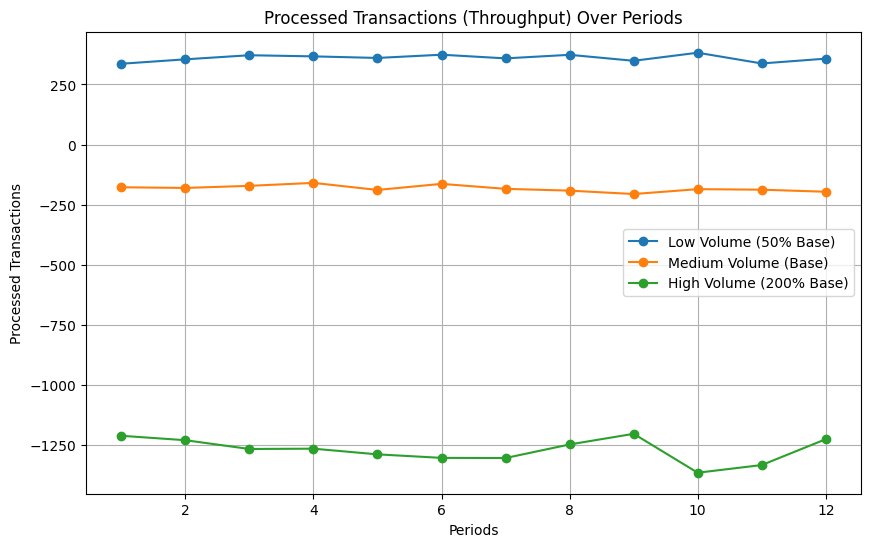

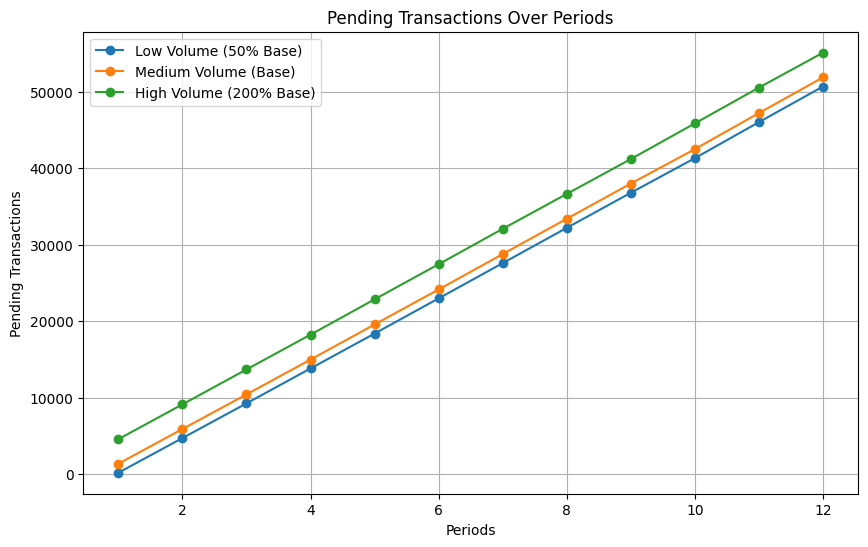

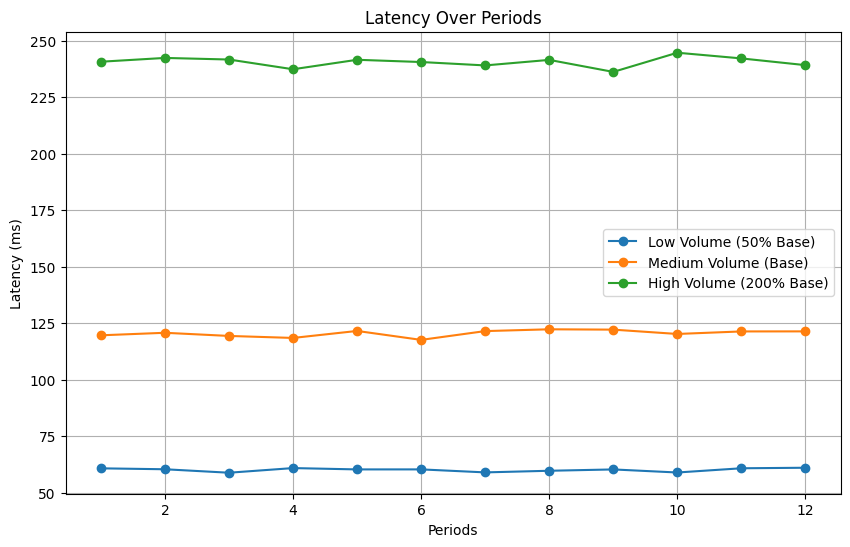

In [3]:
import matplotlib.pyplot as plt

# Extracting data for visualization
periods = [result['period'] for result in stress_test_results]
low_volume_processed = [result['low_volume']['processed_transactions'] for result in stress_test_results]
medium_volume_processed = [result['medium_volume']['processed_transactions'] for result in stress_test_results]
high_volume_processed = [result['high_volume']['processed_transactions'] for result in stress_test_results]

low_volume_pending = [result['low_volume']['pending_transactions'] for result in stress_test_results]
medium_volume_pending = [result['medium_volume']['pending_transactions'] for result in stress_test_results]
high_volume_pending = [result['high_volume']['pending_transactions'] for result in stress_test_results]

low_volume_latency = [result['low_volume']['latency'] for result in stress_test_results]
medium_volume_latency = [result['medium_volume']['latency'] for result in stress_test_results]
high_volume_latency = [result['high_volume']['latency'] for result in stress_test_results]

# Plot 1: Processed Transactions (Throughput) over Periods
plt.figure(figsize=(10, 6))
plt.plot(periods, low_volume_processed, label='Low Volume (50% Base)', marker='o')
plt.plot(periods, medium_volume_processed, label='Medium Volume (Base)', marker='o')
plt.plot(periods, high_volume_processed, label='High Volume (200% Base)', marker='o')
plt.xlabel('Periods')
plt.ylabel('Processed Transactions')
plt.title('Processed Transactions (Throughput) Over Periods')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Pending Transactions over Periods
plt.figure(figsize=(10, 6))
plt.plot(periods, low_volume_pending, label='Low Volume (50% Base)', marker='o')
plt.plot(periods, medium_volume_pending, label='Medium Volume (Base)', marker='o')
plt.plot(periods, high_volume_pending, label='High Volume (200% Base)', marker='o')
plt.xlabel('Periods')
plt.ylabel('Pending Transactions')
plt.title('Pending Transactions Over Periods')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Latency over Periods
plt.figure(figsize=(10, 6))
plt.plot(periods, low_volume_latency, label='Low Volume (50% Base)', marker='o')
plt.plot(periods, medium_volume_latency, label='Medium Volume (Base)', marker='o')
plt.plot(periods, high_volume_latency, label='High Volume (200% Base)', marker='o')
plt.xlabel('Periods')
plt.ylabel('Latency (ms)')
plt.title('Latency Over Periods')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
def simulate_bandwidth_throttling(network_model, periods):
        for period in range(periods):
            if period == 3 or period == 4:  # Simulate bandwidth throttling for periods 3 and 4
                network_model.current_bandwidth *= 0.5  # Reduce bandwidth by 50%

            if period == 5:  # Restore bandwidth after throttling
                network_model.current_bandwidth = network_model.block_size_params['network_bandwidth']

            # Run network performance
            performance = network_model.simulate_network_performance(network_model.base_transaction_volume)
            print(f"Period {period + 1}: {performance}")

    # Simulate bandwidth throttling and recovery
simulate_bandwidth_throttling(network_model, periods=12)

Period 1: {'transaction_volume': 1000, 'processed_transactions': -199.98847568936986, 'pending_transactions': 111106.93627024478, 'fees_collected': -1.9998847568936986, 'latency': 121.79120127111715, 'throughput': -199.98847568936986, 'block_utilization': -220.6399696313041, 'fault_tolerance': 0.7821926904817257}
Period 2: {'transaction_volume': 1000, 'processed_transactions': -168.97501081453362, 'pending_transactions': 112275.91128105932, 'fees_collected': -1.6897501081453363, 'latency': 119.1717643606263, 'throughput': -168.97501081453362, 'block_utilization': -196.66390540583032, 'fault_tolerance': 0.7646965577835573}
Period 3: {'transaction_volume': 1000, 'processed_transactions': -206.1431595137601, 'pending_transactions': 113482.05444057308, 'fees_collected': -2.061431595137601, 'latency': 122.32940947475966, 'throughput': -206.1431595137601, 'block_utilization': -253.70715892627933, 'fault_tolerance': 0.8025417364317572}
Period 4: {'transaction_volume': 1000, 'processed_transac

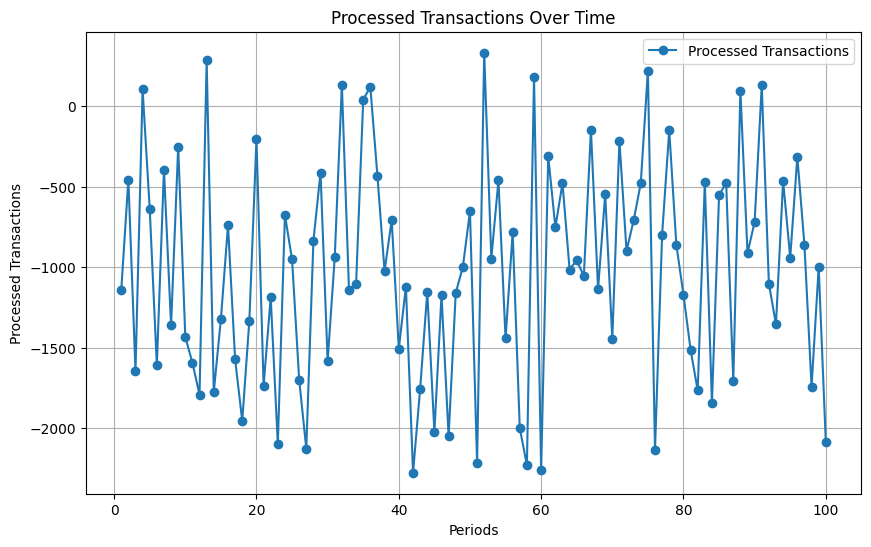

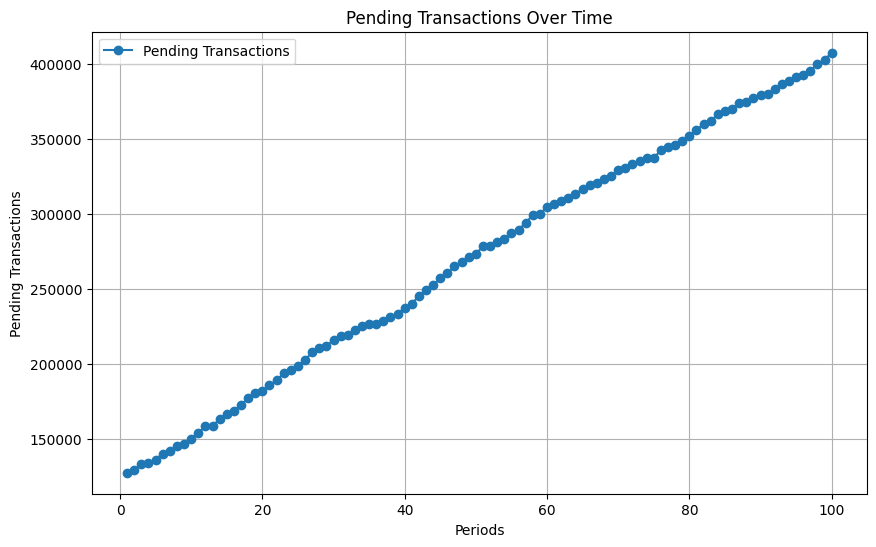

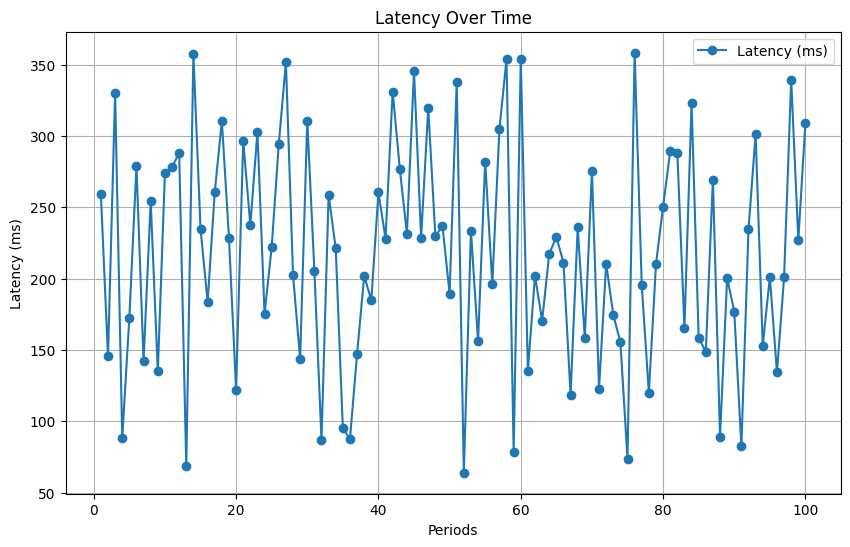

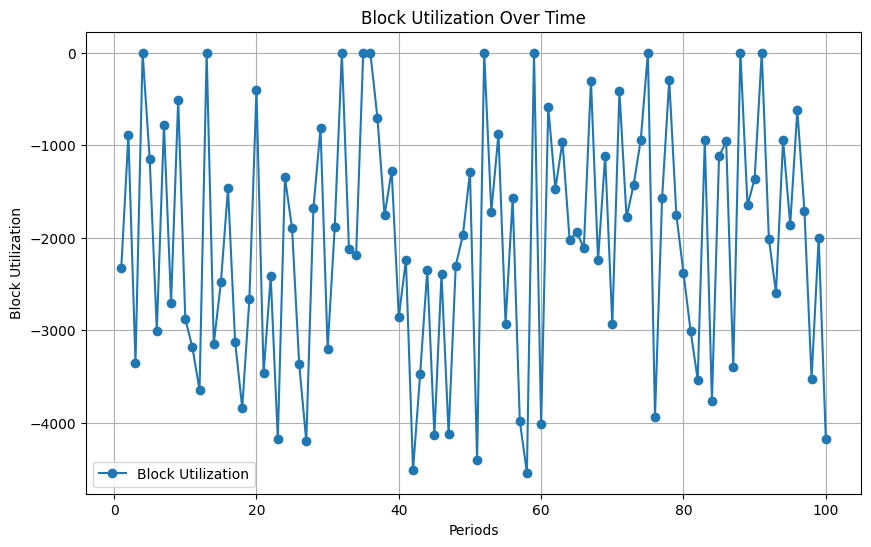

In [7]:

import random
periods = 100  # Extend the simulation to 100 periods for long-term performance analysis
stress_test_results = []

    # Random spikes in transaction volume
for period in range(periods):
    # Random spikes in transaction volume (ranging from 50% to 300% of base volume)
    transaction_volume = network_model.base_transaction_volume * random.uniform(0.5, 3.0)
    
    # Simulate random consensus efficiency changes
    network_model.consensus_params['efficiency'] = random.uniform(0.7, 1.0)  # Random efficiency between 70% and 100%
    
    # Simulate validator failures
    if random.random() < 0.1:  # 10% chance that validators go offline
        network_model.fault_tolerance_params['base_fault_tolerance'] -= random.uniform(0.05, 0.1)  # Reduce fault tolerance
    else:
        # Validators come back online and fault tolerance increases
        network_model.fault_tolerance_params['base_fault_tolerance'] = min(0.9, network_model.fault_tolerance_params['base_fault_tolerance'] + 0.05)
    
    # Run network performance simulation for this period
    performance = network_model.simulate_network_performance(transaction_volume)
    
    # Store the result
    stress_test_results.append(performance)

# Collect data for visualization
periods_range = list(range(1, periods + 1))
processed_transactions = [result['processed_transactions'] for result in stress_test_results]
pending_transactions = [result['pending_transactions'] for result in stress_test_results]
latency = [result['latency'] for result in stress_test_results]
block_utilization = [result['block_utilization'] for result in stress_test_results]

# Visualize results

# Function to visualize results for the extended stress test

# Plot 1: Processed Transactions over Time
plt.figure(figsize=(10, 6))
plt.plot(periods_range, processed_transactions, label='Processed Transactions', marker='o')
plt.xlabel('Periods')
plt.ylabel('Processed Transactions')
plt.title('Processed Transactions Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Pending Transactions over Time
plt.figure(figsize=(10, 6))
plt.plot(periods_range, pending_transactions, label='Pending Transactions', marker='o')
plt.xlabel('Periods')
plt.ylabel('Pending Transactions')
plt.title('Pending Transactions Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Latency over Time
plt.figure(figsize=(10, 6))
plt.plot(periods_range, latency, label='Latency (ms)', marker='o')
plt.xlabel('Periods')
plt.ylabel('Latency (ms)')
plt.title('Latency Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot 4: Block Utilization over Time
plt.figure(figsize=(10, 6))
plt.plot(periods_range, block_utilization, label='Block Utilization', marker='o')
plt.xlabel('Periods')
plt.ylabel('Block Utilization')
plt.title('Block Utilization Over Time')
plt.legend()
plt.grid(True)
plt.show()
